In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Analises Pós Modelos

Vamos categorizar os daods númericos

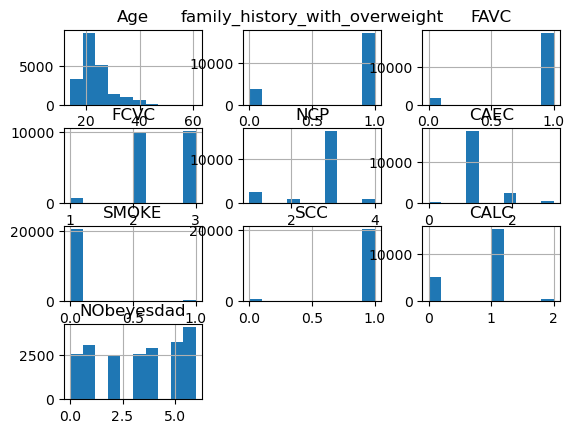

In [3]:
df = pd.read_pickle('df_after_models.pkl')
df.hist()

df_test = pd.read_pickle('df_test_after_models.pkl')

<Axes: >

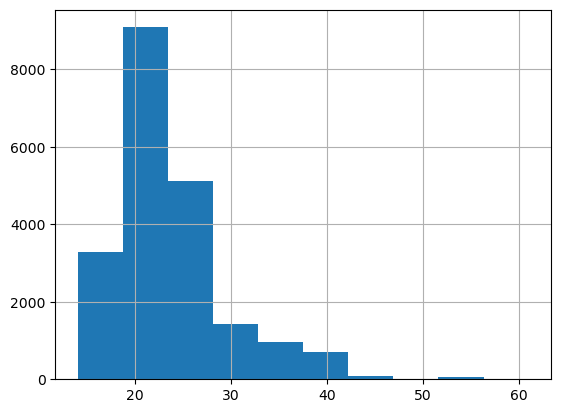

In [4]:
df['Age'].hist()

O LabelEncoder foi escolhido porque a idade é um atributo progressivo

In [5]:
limites_faixas = [0, 20, 30, 40, 50,60,float('inf')]

df['Age'] = pd.cut(df['Age'], bins=limites_faixas, right=False)
df['Age'] = pd.factorize(df['Age'])[0]

df.head()


,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,...,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,AUTOMOBILE,PUBLIC_TRANS,WALKING,IMC
0,0.0,1.0,0,0,1.699998,81.66995,1,1,2,3,...,2.763573,1,0.0,0.976473,1,3,0.0,1.0,0.0,28.259565
1,1.0,0.0,1,1,1.56,57.0,1,1,2,3,...,2.0,1,1.0,1.0,0,1,1.0,0.0,0.0,23.422091
2,1.0,0.0,2,1,1.71146,50.165754,1,1,2,1,...,1.910378,1,0.866045,1.673584,0,0,0.0,1.0,0.0,17.126706
3,1.0,0.0,3,0,1.71073,131.274851,1,1,3,3,...,1.674061,1,1.467863,0.780199,1,6,0.0,1.0,0.0,44.855798
4,0.0,1.0,4,2,1.914186,93.798055,1,1,3,2,...,1.979848,1,1.967973,0.931721,1,3,0.0,1.0,0.0,25.599151


In [6]:
limites_faixas = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]

df['IMC'] = pd.cut(df['IMC'], bins=limites_faixas, right=False)
df['IMC'] = pd.factorize(df['IMC'])[0]
df.head()



,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,...,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,AUTOMOBILE,PUBLIC_TRANS,WALKING,IMC
0,0.0,1.0,0,0,1.699998,81.66995,1,1,2,3,...,2.763573,1,0.0,0.976473,1,3,0.0,1.0,0.0,0
1,1.0,0.0,1,1,1.56,57.0,1,1,2,3,...,2.0,1,1.0,1.0,0,1,1.0,0.0,0.0,1
2,1.0,0.0,2,1,1.71146,50.165754,1,1,2,1,...,1.910378,1,0.866045,1.673584,0,0,0.0,1.0,0.0,2
3,1.0,0.0,3,0,1.71073,131.274851,1,1,3,3,...,1.674061,1,1.467863,0.780199,1,6,0.0,1.0,0.0,3
4,0.0,1.0,4,2,1.914186,93.798055,1,1,3,2,...,1.979848,1,1.967973,0.931721,1,3,0.0,1.0,0.0,0


Agora observe o que houve na categorização acima, os valores de NObeysdad mesmo nas primeiras cinco colunas diferenciam muito do IMC calculado

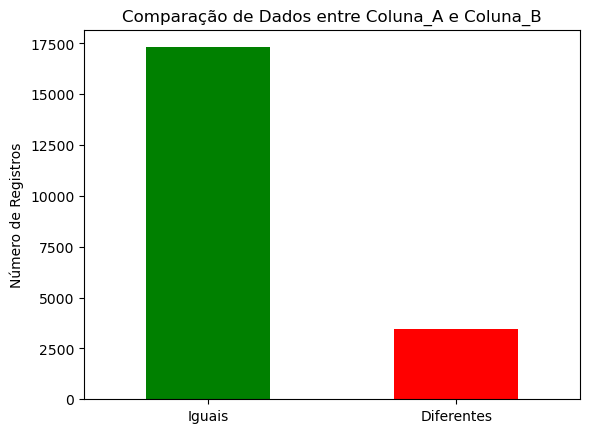

In [7]:
# Verificando se os dados das colunas correspondentes são iguais
resultados = df['NObeyesdad'] == df['IMC']

# Contando o número de registros com dados iguais e diferentes
contagem = resultados.value_counts()

# Criando o gráfico de barras
fig, ax = plt.subplots()
contagem.plot(kind='bar', ax=ax, color=['green', 'red'])

# Configurando o gráfico
ax.set_xticklabels(['Iguais', 'Diferentes'], rotation=0)
ax.set_ylabel('Número de Registros')
ax.set_title('Comparação de Dados entre Coluna_A e Coluna_B')

# Exibindo o gráfico
plt.show()

A maioria dos dados são iguais, então existe uma diferença gerada provavelmente pelo modelo aleatório. Vamos categorizar a altura e o peso também, usando como parametro o ViolinPlot em read_data.ipynb

In [8]:
limites_faixas = [0, 1.5, 1.6, 1.7, 1.8, 1.9, float('inf')]

df['Height'] = pd.cut(df['Height'], bins=limites_faixas, right=False)
df['Height'] = pd.factorize(df['Height'])[0]
df.head()

,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,...,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,AUTOMOBILE,PUBLIC_TRANS,WALKING,IMC
0,0.0,1.0,0,0,0,81.66995,1,1,2,3,...,2.763573,1,0.0,0.976473,1,3,0.0,1.0,0.0,0
1,1.0,0.0,1,1,1,57.0,1,1,2,3,...,2.0,1,1.0,1.0,0,1,1.0,0.0,0.0,1
2,1.0,0.0,2,1,2,50.165754,1,1,2,1,...,1.910378,1,0.866045,1.673584,0,0,0.0,1.0,0.0,2
3,1.0,0.0,3,0,2,131.274851,1,1,3,3,...,1.674061,1,1.467863,0.780199,1,6,0.0,1.0,0.0,3
4,0.0,1.0,4,2,3,93.798055,1,1,3,2,...,1.979848,1,1.967973,0.931721,1,3,0.0,1.0,0.0,0


In [9]:
limites_faixas = [0, 40, 60, 80, 100, 120, 140, 160, float('inf')]

df['Weight'] = pd.cut(df['Weight'], bins=limites_faixas, right=False)
df['Weight'] = pd.factorize(df['Weight'])[0]
df.head()

,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,...,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,AUTOMOBILE,PUBLIC_TRANS,WALKING,IMC
0,0.0,1.0,0,0,0,0,1,1,2,3,...,2.763573,1,0.0,0.976473,1,3,0.0,1.0,0.0,0
1,1.0,0.0,1,1,1,1,1,1,2,3,...,2.0,1,1.0,1.0,0,1,1.0,0.0,0.0,1
2,1.0,0.0,2,1,2,1,1,1,2,1,...,1.910378,1,0.866045,1.673584,0,0,0.0,1.0,0.0,2
3,1.0,0.0,3,0,2,2,1,1,3,3,...,1.674061,1,1.467863,0.780199,1,6,0.0,1.0,0.0,3
4,0.0,1.0,4,2,3,0,1,1,3,2,...,1.979848,1,1.967973,0.931721,1,3,0.0,1.0,0.0,0


Vamos tratar agora os dados de teste e passar tudo para o RandomForest

In [10]:
limites_faixas = [0, 20, 30, 40, 50,60,float('inf')]

df_test['Age'] = pd.cut(df_test['Age'], bins=limites_faixas, right=False)
df_test['Age'] = pd.factorize(df_test['Age'])[0]

limites_faixas = [0, 1.5, 1.6, 1.7, 1.8, 1.9, float('inf')]

df_test['Height'] = pd.cut(df_test['Height'], bins=limites_faixas, right=False)
df_test['Height'] = pd.factorize(df_test['Height'])[0]

limites_faixas = [0, 40, 60, 80, 100, 120, 140, 160, float('inf')]

df_test['Weight'] = pd.cut(df_test['Weight'], bins=limites_faixas, right=False)
df_test['Weight'] = pd.factorize(df_test['Weight'])[0]
df_test.head()


,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,...,SMOKE,CH2O,SCC,FAF,TUE,CALC,AUTOMOBILE,PUBLIC_TRANS,WALKING,IMC
0,0.0,1.0,20758,0,0,0,1,1,3,3,...,0,2.825629,1,0.8554,0.0,1,0.0,1.0,0.0,41.745489
1,1.0,0.0,20759,0,1,1,1,1,2,1,...,0,3.0,1,1.0,0.0,1,0.0,1.0,0.0,27.120316
2,1.0,0.0,20760,0,1,2,1,1,3,3,...,0,2.621877,1,0.0,0.250502,1,0.0,1.0,0.0,38.10069
3,0.0,1.0,20761,0,2,2,1,1,2,3,...,0,2.786417,1,0.094851,0.0,1,0.0,1.0,0.0,35.423091
4,1.0,0.0,20762,0,1,2,1,1,3,3,...,0,2.653531,1,0.0,0.741069,1,0.0,1.0,0.0,28.611423


Vou retirar do modelo SMOKE, pois assim como tem gente gorda e magra que fuma, não acho que seja um bom indicador

In [11]:
y = df['NObeyesdad']
id = df['id']
X = df.drop(['NObeyesdad','id','SMOKE'], axis=1)

y = y.to_numpy()
X = X.to_numpy()

nobsedy_invertio = {3: 'Overweight_Level_II', 1: 'Normal_Weight', 0: 'Insufficient_Weight',
                     6: 'Obesity_Type_III', 5: 'Obesity_Type_II', 2: 'Overweight_Level_I', 4: 'Obesity_Type_I'}

id_test = df_test['id']
X_test = df_test.drop(['id','SMOKE'],axis=1).to_numpy()

## Modelos

In [12]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
	# get data
	train_X, test_X = X[train], X[test]
	train_y, test_y = y[train], y[test]
	# fit model
	model = RandomForestClassifier(n_estimators=300)
	model.fit(train_X, train_y)
	# evaluate model
	ypred = model.predict(test_X)
	acc = accuracy_score(test_y, ypred)
	# store score
	scores.append(acc)
	print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))

fold 0> accuracy =  0.8848747591522158
fold 1> accuracy =  0.8665703275529865
fold 2> accuracy =  0.8574181117533719
fold 3> accuracy =  0.8665703275529865
fold 4> accuracy =  0.8665703275529865
fold 5> accuracy =  0.869942196531792
fold 6> accuracy =  0.8598265895953757
fold 7> accuracy =  0.8617533718689788
fold 8> accuracy =  0.88
fold 9> accuracy =  0.8756626506024097
Accuracy Mean: 0.869, Standard Deviation: 0.008


In [13]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
	# get data
	train_X, test_X = X[train], X[test]
	train_y, test_y = y[train], y[test]
	# fit model
	model = KNeighborsClassifier(n_neighbors=10)
	model.fit(train_X, train_y)
	# evaluate model
	ypred = model.predict(test_X)
	acc = accuracy_score(test_y, ypred)
	# store score
	scores.append(acc)
	print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))

c:\Users\larae\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\larae\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


fold 0> accuracy =  0.8651252408477842
fold 1> accuracy =  0.8526011560693642
fold 2> accuracy =  0.8415221579961464
fold 3> accuracy =  0.8607899807321773
fold 4> accuracy =  0.8578998073217726
fold 5> accuracy =  0.8641618497109826
fold 6> accuracy =  0.855009633911368
fold 7> accuracy =  0.8511560693641619
fold 8> accuracy =  0.8722891566265061
fold 9> accuracy =  0.8573493975903614
Accuracy Mean: 0.858, Standard Deviation: 0.008


Com a categorização ambos ficaram piores.

# Nova Analise

In [14]:
df = pd.read_pickle('df_after_models.pkl')

df_test = pd.read_pickle('df_test_after_models.pkl')

In [15]:
df.head()

,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,...,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,AUTOMOBILE,PUBLIC_TRANS,WALKING,IMC
0,0.0,1.0,0,24,1.699998,81.66995,1,1,2,3,...,2.763573,1,0.0,0.976473,1,3,0.0,1.0,0.0,28.259565
1,1.0,0.0,1,18,1.56,57.0,1,1,2,3,...,2.0,1,1.0,1.0,0,1,1.0,0.0,0.0,23.422091
2,1.0,0.0,2,18,1.71146,50.165754,1,1,2,1,...,1.910378,1,0.866045,1.673584,0,0,0.0,1.0,0.0,17.126706
3,1.0,0.0,3,21,1.71073,131.274851,1,1,3,3,...,1.674061,1,1.467863,0.780199,1,6,0.0,1.0,0.0,44.855798
4,0.0,1.0,4,32,1.914186,93.798055,1,1,3,2,...,1.979848,1,1.967973,0.931721,1,3,0.0,1.0,0.0,25.599151


Vamos criar o consumo de água por peso, no lugar de apenas consumo de água, já que o consumo de água ideal de uma pessoa é dado por peso

In [16]:
df['WaterWei'] = df['CH2O'] / df['Weight']
df_test['WaterWei'] = df['CH2O'] / df['Weight']

In [17]:
#limites_faixas = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]

#df['IMC'] = pd.cut(df['IMC'], bins=limites_faixas, right=False)
#df['IMC'] = pd.factorize(df['IMC'])[0]
#df.head()


Olhando as discussões do Kaggle, observamos alguns usuários que mesclararm algumas colunas

Criamos abaixo a coluna FAF_TUE, pois se FAF é a atividade fisica e TUE é o tempo usando eletronicos, vamos subtrair um pelo outro, uma pessoa não obesa deve ter o FAF_TUE positivo.

E pensamos em criar o número relacionado ao numero de refeições principais e o consumo de vegetais

Além disso o cosumo de comida gordurosa por refeição

In [18]:
df['FAF_TUE'] = df['FAF']  - df['TUE']
df_test['FAF_TUE'] = df_test['FAF'] - df_test['TUE']

df['FVCVNCP'] = df['FCVC'] * df['NCP']
df_test['FVCVNCP'] = df_test['FCVC'] * df_test['NCP']

df['NCPFAST'] = df['NCP'] * df['FAVC']
df_test['NCPFAST'] = df_test['NCP'] * df_test['FAVC']


In [19]:
df.columns

Index(['__Gender_Female', '__Gender_Male', 'id', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'NObeyesdad',
       'AUTOMOBILE', 'PUBLIC_TRANS', 'WALKING', 'IMC', 'WaterWei', 'FAF_TUE',
       'FVCVNCP', 'NCPFAST'],
      dtype='object')

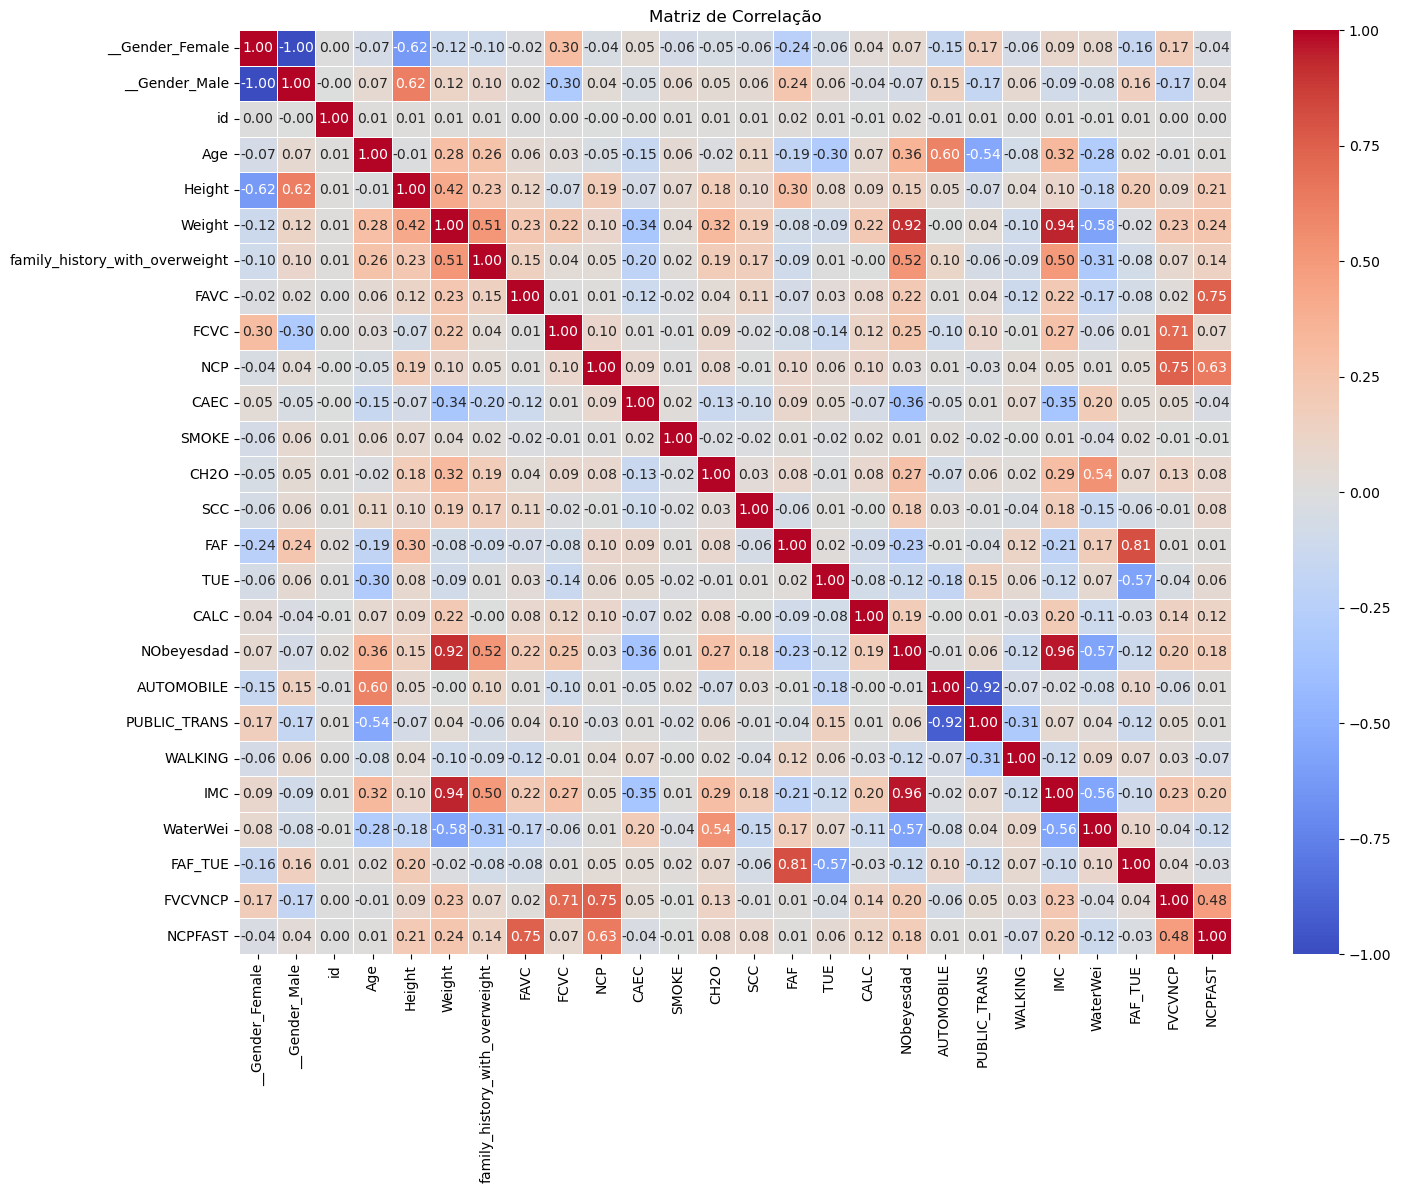

In [20]:
number = df
matriz_correlacao = number.corr()

# Criação do mapa de calor com seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Adiciona título
plt.title('Matriz de Correlação')

# Exibe o gráfico
plt.show()

In [21]:
y = df['NObeyesdad']
id = df['id']
X = df.drop(['NObeyesdad','id'], axis=1)

y = y.to_numpy()
X = X.to_numpy()

nobsedy_invertio = {3: 'Overweight_Level_II', 1: 'Normal_Weight', 0: 'Insufficient_Weight',
                     6: 'Obesity_Type_III', 5: 'Obesity_Type_II', 2: 'Overweight_Level_I', 4: 'Obesity_Type_I'}

id_test = df_test['id']
X_test = df_test.drop(['id'],axis=1).to_numpy()

In [22]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
	# get data
	train_X, test_X = X[train], X[test]
	train_y, test_y = y[train], y[test]
	# fit model
	model = KNeighborsClassifier(n_neighbors=10)
	model.fit(train_X, train_y)
	# evaluate model
	ypred = model.predict(test_X)
	acc = accuracy_score(test_y, ypred)
	# store score
	scores.append(acc)
	print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))

fold 0> accuracy =  0.8786127167630058
fold 1> accuracy =  0.869942196531792
fold 2> accuracy =  0.8578998073217726
fold 3> accuracy =  0.871868978805395
fold 4> accuracy =  0.8742774566473989
fold 5> accuracy =  0.8815028901734104
fold 6> accuracy =  0.8742774566473989
fold 7> accuracy =  0.8641618497109826
fold 8> accuracy =  0.8809638554216868
fold 9> accuracy =  0.8785542168674699
Accuracy Mean: 0.873, Standard Deviation: 0.007


In [23]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
	# get data
	train_X, test_X = X[train], X[test]
	train_y, test_y = y[train], y[test]
	# fit model
	model = RandomForestClassifier(n_estimators=300)
	model.fit(train_X, train_y)
	# evaluate model
	ypred = model.predict(test_X)
	acc = accuracy_score(test_y, ypred)
	# store score
	scores.append(acc)
	print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))


fold 0> accuracy =  0.9089595375722543
fold 1> accuracy =  0.8988439306358381
fold 2> accuracy =  0.890655105973025
fold 3> accuracy =  0.8973988439306358
fold 4> accuracy =  0.8998073217726397
fold 5> accuracy =  0.9007707129094412
fold 6> accuracy =  0.9041425818882466
fold 7> accuracy =  0.894990366088632
fold 8> accuracy =  0.9065060240963856
fold 9> accuracy =  0.8997590361445783
Accuracy Mean: 0.900, Standard Deviation: 0.005


In [24]:
rf_model = RandomForestClassifier()

# Treine o modelo
rf_model.fit(X, y)

# Obtenha a importância dos recursos
importances = rf_model.feature_importances_

# Ordene os índices dos recursos pela importância
indices = np.argsort(importances)
# Imprima os recursos e suas importâncias
X2 = df.drop(['NObeyesdad','id'], axis=1)
for i in indices:
    print(f"Feature {X2.columns[i]}: {importances[i]}")


Feature SMOKE: 0.0007682503373915308
Feature WALKING: 0.0017235180574131455
Feature SCC: 0.003089285918168458
Feature AUTOMOBILE: 0.00506805284845597
Feature FAVC: 0.005540824693946301
Feature PUBLIC_TRANS: 0.0060312733781821655
Feature NCP: 0.008429344968047162
Feature NCPFAST: 0.011574440086169285
Feature CAEC: 0.015611212029808249
Feature CALC: 0.016702106333051407
Feature family_history_with_overweight: 0.01997905301907244
Feature FCVC: 0.022159992466179203
Feature TUE: 0.022452040708772717
Feature FAF_TUE: 0.023014492678823755
Feature FAF: 0.02344167216961069
Feature FVCVNCP: 0.02865702716628387
Feature __Gender_Female: 0.0310488604957796
Feature CH2O: 0.032980381559190385
Feature __Gender_Male: 0.03869598339225722
Feature Height: 0.055304778317736204
Feature Age: 0.05561663427004701
Feature WaterWei: 0.07273555117579827
Feature Weight: 0.20156796219005826
Feature IMC: 0.2978072617397567


Achamos comico que mesmo manipulando os dados não encontramos força nos atributos para a geração do modelo, embora aárvore tenha dado valores mais altos que os iniciais, creio que isso seja devido a natureza sintetica dos dados, tanto que o valor de imc quando categorizado, não está de acordo com o a classe esperada. Vamos categorizar os dados agora

In [25]:
limites_faixas = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]

df['IMCC'] = pd.cut(df['IMC'], bins=limites_faixas, right=False)
df['IMCC'] = pd.factorize(df['IMC'])[0]
df.head()

,__Gender_Female,__Gender_Male,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,...,NObeyesdad,AUTOMOBILE,PUBLIC_TRANS,WALKING,IMC,WaterWei,FAF_TUE,FVCVNCP,NCPFAST,IMCC
0,0.0,1.0,0,24,1.699998,81.66995,1,1,2,3,...,3,0.0,1.0,0.0,28.259565,0.033838,-0.976473,6,3,0
1,1.0,0.0,1,18,1.56,57.0,1,1,2,3,...,1,1.0,0.0,0.0,23.422091,0.035088,0.0,6,3,1
2,1.0,0.0,2,18,1.71146,50.165754,1,1,2,1,...,0,0.0,1.0,0.0,17.126706,0.038081,-0.807539,2,1,2
3,1.0,0.0,3,21,1.71073,131.274851,1,1,3,3,...,6,0.0,1.0,0.0,44.855798,0.012752,0.687664,9,3,3
4,0.0,1.0,4,32,1.914186,93.798055,1,1,3,2,...,3,0.0,1.0,0.0,25.599151,0.021108,1.036252,6,2,4


In [26]:
df.columns

Index(['__Gender_Female', '__Gender_Male', 'id', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'NObeyesdad',
       'AUTOMOBILE', 'PUBLIC_TRANS', 'WALKING', 'IMC', 'WaterWei', 'FAF_TUE',
       'FVCVNCP', 'NCPFAST', 'IMCC'],
      dtype='object')

In [27]:
y = df['NObeyesdad']
id = df['id']
X = df.drop(['NObeyesdad','id','IMC'], axis=1)

y = y.to_numpy()
X = X.to_numpy()

nobsedy_invertio = {3: 'Overweight_Level_II', 1: 'Normal_Weight', 0: 'Insufficient_Weight',
                     6: 'Obesity_Type_III', 5: 'Obesity_Type_II', 2: 'Overweight_Level_I', 4: 'Obesity_Type_I'}

id_test = df_test['id']
X_test = df_test.drop(['id','IMC'],axis=1).to_numpy()

In [28]:
rf_model = RandomForestClassifier()

# Treine o modelo
rf_model.fit(X, y)

# Obtenha a importância dos recursos
importances = rf_model.feature_importances_

# Ordene os índices dos recursos pela importância
indices = np.argsort(importances)
# Imprima os recursos e suas importâncias
X2 = df.drop(['NObeyesdad','id','IMC'], axis=1)
for i in indices:
    print(f"Feature {X2.columns[i]}: {importances[i]}")

Feature SMOKE: 0.0008137751176805713
Feature WALKING: 0.0018555048792728388
Feature SCC: 0.003685194448642122
Feature FAVC: 0.00654723019168452
Feature PUBLIC_TRANS: 0.007319967692549384
Feature AUTOMOBILE: 0.007930209207469998
Feature NCP: 0.00960907909587824
Feature NCPFAST: 0.015130067477531803
Feature CAEC: 0.02012934627046382
Feature CALC: 0.020328029092494683
Feature FCVC: 0.025538053119070717
Feature family_history_with_overweight: 0.026361397368266343
Feature FAF_TUE: 0.027682839468239066
Feature FAF: 0.028710323791039997
Feature TUE: 0.0328783396245525
Feature FVCVNCP: 0.041584990004071606
Feature __Gender_Female: 0.04313972777146208
Feature IMCC: 0.04600628763765041
Feature __Gender_Male: 0.04616152761475689
Feature CH2O: 0.04664240194916375
Feature Age: 0.06902227190949314
Feature Height: 0.07135952461570062
Feature WaterWei: 0.10528826067333019
Feature Weight: 0.29627565097953473


In [29]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
	# get data
	train_X, test_X = X[train], X[test]
	train_y, test_y = y[train], y[test]
	# fit model
	model = RandomForestClassifier(n_estimators=300)
	model.fit(train_X, train_y)
	# evaluate model
	ypred = model.predict(test_X)
	acc = accuracy_score(test_y, ypred)
	# store score
	scores.append(acc)
	print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))

fold 0> accuracy =  0.903179190751445
fold 1> accuracy =  0.8983622350674374
fold 2> accuracy =  0.8834296724470135
fold 3> accuracy =  0.8925818882466281
fold 4> accuracy =  0.8935452793834296
fold 5> accuracy =  0.8998073217726397
fold 6> accuracy =  0.901252408477842
fold 7> accuracy =  0.8892100192678227
fold 8> accuracy =  0.8997590361445783
fold 9> accuracy =  0.8973493975903615
Accuracy Mean: 0.896, Standard Deviation: 0.006


In [30]:
df.columns

Index(['__Gender_Female', '__Gender_Male', 'id', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'NObeyesdad',
       'AUTOMOBILE', 'PUBLIC_TRANS', 'WALKING', 'IMC', 'WaterWei', 'FAF_TUE',
       'FVCVNCP', 'NCPFAST', 'IMCC'],
      dtype='object')

In [31]:
# Selecione as características com base na ordem de importância, excluindo as primeiras
features_selecionadas = [
    'family_history_with_overweight', 'FAF', 'FAF_TUE', 'TUE', 'FCVC', 'FVCVNCP',
    '__Gender_Female', 'CH2O', '__Gender_Male', 'Age', 'Height', 'WaterWei', 'Weight', 'IMC'
]

# Selecionar apenas as características relevantes nos conjuntos de treino e teste
X = df[features_selecionadas]
X_test = df_test[features_selecionadas]
y = df['NObeyesdad']


In [32]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
    # get data
    train_X, test_X = X.iloc[train], X.iloc[test]
    train_y, test_y = y.iloc[train], y.iloc[test]

    # fit model
    model = RandomForestClassifier(n_estimators=300)
    model.fit(train_X, train_y)

    # evaluate model
    ypred = model.predict(test_X)
    acc = accuracy_score(test_y, ypred)

    # store score
    scores.append(acc)
    print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))


fold 0> accuracy =  0.896917148362235
fold 1> accuracy =  0.8877649325626205
fold 2> accuracy =  0.8747591522157996
fold 3> accuracy =  0.8892100192678227
fold 4> accuracy =  0.8925818882466281
fold 5> accuracy =  0.8896917148362236
fold 6> accuracy =  0.890655105973025
fold 7> accuracy =  0.8752408477842004
fold 8> accuracy =  0.8944578313253012
fold 9> accuracy =  0.8930120481927711
Accuracy Mean: 0.888, Standard Deviation: 0.007


O modelo deu a acuracia média da mesma como se estivesse com todos os outros atributos, e gerou um resultado um pouco melhor do que o melhor modelo de árvore anterior, vamos deixa-los assim por enquanto. Verificar com Gradient Boosting 

In [33]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
    # get data
    train_X, test_X = X.iloc[train], X.iloc[test]
    train_y, test_y = y.iloc[train], y.iloc[test]

    # fit model
    model = GradientBoostingClassifier()
    model.fit(train_X, train_y)

    # evaluate model
    ypred = model.predict(test_X)
    acc = accuracy_score(test_y, ypred)

    # store score
    scores.append(acc)
    print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))

fold 0> accuracy =  0.9060693641618497
fold 1> accuracy =  0.8896917148362236
fold 2> accuracy =  0.8805394990366089
fold 3> accuracy =  0.8940269749518305
fold 4> accuracy =  0.8973988439306358
fold 5> accuracy =  0.8925818882466281
fold 6> accuracy =  0.8935452793834296
fold 7> accuracy =  0.890655105973025
fold 8> accuracy =  0.895421686746988
fold 9> accuracy =  0.895421686746988
Accuracy Mean: 0.894, Standard Deviation: 0.006


Observamos que ficou melhor um pouco, mas não está melhor do que o melhor GradientBoosting já feito. 

Vamos repetir o experimento, tirando alguns valores da floresta, que de certa forma foi manipulado ou resultado de manipulação

In [38]:
# Selecione as características com base na ordem de importância, excluindo as primeiras
features_selecionadas = [
    'family_history_with_overweight', 'FAF_TUE', 'FVCVNCP',
    '__Gender_Female', '__Gender_Male', 'Age', 'WaterWei', 'IMC'
]

# Selecionar apenas as características relevantes nos conjuntos de treino e teste
X = df[features_selecionadas]
X_test = df_test[features_selecionadas]
y = df['NObeyesdad']


In [39]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
    # get data
    train_X, test_X = X.iloc[train], X.iloc[test]
    train_y, test_y = y.iloc[train], y.iloc[test]

    # fit model
    model = RandomForestClassifier(n_estimators=300)
    model.fit(train_X, train_y)

    # evaluate model
    ypred = model.predict(test_X)
    acc = accuracy_score(test_y, ypred)

    # store score
    scores.append(acc)
    print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))


fold 0> accuracy =  0.878131021194605
fold 1> accuracy =  0.867533718689788
fold 2> accuracy =  0.859344894026975
fold 3> accuracy =  0.865606936416185
fold 4> accuracy =  0.8786127167630058
fold 5> accuracy =  0.8660886319845857
fold 6> accuracy =  0.871868978805395
fold 7> accuracy =  0.859344894026975
fold 8> accuracy =  0.8703614457831326
fold 9> accuracy =  0.8722891566265061
Accuracy Mean: 0.869, Standard Deviation: 0.006


Vamos remover todos os atributos gerados por nós

In [40]:

features_selecionadas = [
    'family_history_with_overweight', 'FAF', 'TUE', 'FCVC',
    '__Gender_Female', 'CH2O', '__Gender_Male', 'Age', 'Height', 'Weight'
]

# Selecionar apenas as características relevantes nos conjuntos de treino e teste
X = df[features_selecionadas]
X_test = df_test[features_selecionadas]
y = df['NObeyesdad']


In [37]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
    # get data
    train_X, test_X = X.iloc[train], X.iloc[test]
    train_y, test_y = y.iloc[train], y.iloc[test]

    # fit model
    model = RandomForestClassifier(n_estimators=300)
    model.fit(train_X, train_y)

    # evaluate model
    ypred = model.predict(test_X)
    acc = accuracy_score(test_y, ypred)

    # store score
    scores.append(acc)
    print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))

fold 0> accuracy =  0.8988439306358381
fold 1> accuracy =  0.888728323699422
fold 2> accuracy =  0.873795761078998
fold 3> accuracy =  0.8858381502890174
fold 4> accuracy =  0.8810211946050096
fold 5> accuracy =  0.8863198458574181
fold 6> accuracy =  0.8930635838150289
fold 7> accuracy =  0.8839113680154143
fold 8> accuracy =  0.8896385542168674
fold 9> accuracy =  0.8944578313253012
Accuracy Mean: 0.888, Standard Deviation: 0.007


Aparentemente ficou redundate a geração de novos atributos, pontuação de diferença muito pequena. Vamos pegar esses melhores atributos de agora e escalona-los.

# Escalonando



In [52]:
df = pd.read_pickle('df_after_models.pkl')

df_test = pd.read_pickle('df_test_after_models.pkl')

In [67]:

features_selecionadas = [
    'family_history_with_overweight', 'FAF', 'TUE', 'FCVC',
    '__Gender_Female', 'CH2O', '__Gender_Male', 'Age', 'Height', 'Weight'
]

# Selecionar apenas as características relevantes nos conjuntos de treino e teste
X = df[features_selecionadas]
X_test = df_test[features_selecionadas]
y = df['NObeyesdad']


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)


In [69]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
	# get data
	train_X, test_X = X[train], X[test]
	train_y, test_y = y[train], y[test]
	# fit model
	model = KNeighborsClassifier(n_neighbors=100)
	model.fit(train_X, train_y)
	# evaluate model
	ypred = model.predict(test_X)
	acc = accuracy_score(test_y, ypred)
	# store score
	scores.append(acc)
	print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))

fold 0> accuracy =  0.7196531791907514
fold 1> accuracy =  0.7167630057803468
fold 2> accuracy =  0.7167630057803468
fold 3> accuracy =  0.7027938342967245
fold 4> accuracy =  0.7182080924855492
fold 5> accuracy =  0.6999036608863198
fold 6> accuracy =  0.7027938342967245
fold 7> accuracy =  0.7047206165703276
fold 8> accuracy =  0.7272289156626506
fold 9> accuracy =  0.7108433734939759
Accuracy Mean: 0.712, Standard Deviation: 0.009


In [71]:
df = pd.read_pickle('df_after_models.pkl')

df_test = pd.read_pickle('df_test_after_models.pkl')


features_selecionadas = [
    'family_history_with_overweight', 'FAF', 'TUE', 'FCVC',
    '__Gender_Female', 'CH2O', '__Gender_Male', 'Age', 'Height', 'Weight'
]

# Selecionar apenas as características relevantes nos conjuntos de treino e teste
X = df[features_selecionadas]
X_test = df_test[features_selecionadas]
y = df['NObeyesdad']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [72]:
# k-fold cross validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=4)

for k, (train, test) in enumerate(kfold.split(X, y)):
	# get data
	train_X, test_X = X[train], X[test]
	train_y, test_y = y[train], y[test]
	# fit model
	model = KNeighborsClassifier(n_neighbors=100)
	model.fit(train_X, train_y)
	# evaluate model
	ypred = model.predict(test_X)
	acc = accuracy_score(test_y, ypred)
	# store score
	scores.append(acc)
	print(f'fold {k}> accuracy = ', acc)

# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Accuracy Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))


fold 0> accuracy =  0.6926782273603083
fold 1> accuracy =  0.6815992292870906
fold 2> accuracy =  0.678709055876686
fold 3> accuracy =  0.674373795761079
fold 4> accuracy =  0.6878612716763006
fold 5> accuracy =  0.6695568400770713
fold 6> accuracy =  0.6705202312138728
fold 7> accuracy =  0.6700385356454721
fold 8> accuracy =  0.691566265060241
fold 9> accuracy =  0.6828915662650602
Accuracy Mean: 0.680, Standard Deviation: 0.008


Aparentemente, o modelo piorou com o escalonamento padrão do skitlern, tentamos também com todos os atributos não deu resultados tão diferentes. Usamos o KNN porque ele é sensivel as métricas, esperavamos um resultado melhor